# Assignment 1

(This text is copied in from the Course Handbook. Look through that for more context and __tips__!)

This assignment addresses three learning outcomes equally:
* LO1 - Program: Identify and deploy strategies for writing, understanding and managing computer programs using Python and version control
* LO2 - Data: The ability to wrangle, analyse, learn from and visualise a range of data, in a way that demonstrates its relevance to particular contexts of enquiry
* LO3 - Communicate: Communicate around socially relevant issues, supported by the use of multiple data sources and appropriate analysis.

You are asked to carry out a structured analysis on a dataset that has been provided. You will be given a template Notebook that you should fill out with code, which you will then submit. There may be some problems with the data you have been given (i.e. there are definitely problems, and you have to fix them). You are given 3 files:
* This template Notebook to fill in
* The original dataset (restaurant_data.csv)
* A re-ordered version of the data that you can use to check your analysis still works even if the data appears in a different order (restaurant_data_reordered.csv). You will be marked on this!

## Submission
Your submission is a single Jupyter Notebook, submitted through Learn. You should stick to the original structure, putting your code into the code boxes (and creating new code boxes as necessary). Placeholders in the original file such asl “I found these strange things” should be replaced with the strange things that you actually found when doing your analysis.

Your notebook:
* Must be entirely stand-alone - it should assume that the data file is in the same directory, but cannot use any additional data. 
* Must only use modules available on the Edina Notebook server
* Must be submitted with  all of output from the calculations included
* Must work if we press “Clear all output” and then “Run all cells” - CHECK THIS BEFORE HANDING IN!
* Must also work with the re-ordered dataset, without changing any code (this checks that you are working with the values of data, not its location in the file.)


# Setup

In [2]:
# Necessary import
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

First, load the data, from the supplied data file

In [3]:
# Read in the data
data = pd.read_csv("restaurant_data.csv")

# At the end, you'll need to retry this with the re-ordered version by uncommenting these lines:
# data = pd.read_csv("restaurant_data_reordered.csv")

# Have a look at it
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Man,No,Sat,Dinner,3
240,27.18,2.00,Lady,Yes,Sat,Dinner,2
241,22.67,2.00,Man,Yes,Sat,Dinner,2
242,17.82,1.75,Man,No,Sat,Dinner,2


# Cleaning

The data had some some strange things in. Write down all of the strange things that you found here:

### I found the following strange things:
* There are different words for the same sex like 'Man' and 'Male', 'Lady' and 'Female'.
* In the 'day' column, there exist both the 'Thursday' and its abbreviation like 'Thur'.
* In 'total_bill' and 'tip' columns, there are some abnormal values like negative numbers and large outliers (e.g., 9999).

Now, clean the data. Use a separate cell for each operation, and use a text cell to explain _why_ you are doing each operation

First, I am changing all of the "total_bill" and the "tip" to be positive

In [4]:
# More cleaning code goes in here
data['total_bill'] = abs(data['total_bill'])
data['tip'] = abs(data['tip'])


Next, I am removing all of the row including number 9999 in first two column from the data. This is because "total_bill" and "tip" could not be that great.

In [5]:
# Cleaning code goes in here
for _index, _row in data.iterrows():
    if _row['tip'] >= 1000:
        data.drop(index=_index, inplace=True)
        data.reset_index(drop=True, inplace=True)

Next, I am changing all of the
- For "sex" column, "Man" to "Male", "Lady" to "Female"
- For "day" column, don't use abbriviation of day.

In [6]:
# More cleaning code goes in here

sex_dict = {
    'Man':'Male',
    'Male':'Male',
    'Lady':'Female',
    'Female':'Female',
}

day_dict = {
    'Mon':'Monday',
    'Tue':'Tuesday',
    'Wed':'Wednesday',
    'Thur':'Thursday',
    'Thursday':'Thursday',
    'Fri':'Friday',
    'Sat':'Saturday',
    'Sun':'Sunday',
}

for _index, _row in data.iterrows():
    data.loc[_index,'sex'] = sex_dict[_row['sex']]
    data.loc[_index, 'day'] = day_dict[_row['day']]

Now that your data is clean, use some assert statements to check that it fits your picture of how the data should be. Make sure each assert explains why it is there. You should have several asserts, for all of the things that you found in the data that were strange.

assert 3 > 2, "Larger numbers should be greater than smaller numbers" 
assert 2 > 3, "This assert should fail - take it out of your notebook"

In [7]:
for i in range(data.shape[0]):
    assert data['total_bill'][i] > 0, 'Bills should be positive number'
    assert data['tip'][i] > 0, 'Tip should be positive number'
    assert data['total_bill'][i] < 1000
    assert data['tip'][i] < 1000
    assert data['tip'][i] >= data['tip'][i], 'Bills should be greater than tip'
    assert data['sex'][i] in sex_dict.values(), 'The same sex should use same word'
    assert data['day'][i] in day_dict.values(), 'The same day should use same word, not abbreviation'

# Simple Statistical Questions
For each of these, we want a command that just prints the relevant answer. The first one has been filled out as an example


How many rows are in the dataset after cleaning?

In [8]:
data.shape[0] # Simply count the number of rows using shape, and select the first element

243

What is the total amount of money given in tips?

In [9]:
sum(data['tip'])

729.58

How many people are in the largest group?

In [10]:
data['size'].max()

6

Count how many of the bills were paid by males, and how many were paid by females

In [11]:
male_payment = data['sex'].value_counts()
print(male_payment)

Male      156
Female     87
Name: sex, dtype: int64


What was the larges amount of money given as a tip?

In [12]:
data['tip'].max()

10.0

What day of the week was the largest tip given on?

In [26]:
(data[data['tip']==data['tip'].max()]['day']).values[0]

'Saturday'

In [28]:
a = data[data['tip']==data['tip'].max()]['day']

Add a column with the proportion of the bill given as in your DataFrame (e.g. if the meal cost £10 and the tip was £2.5, the column would contain 0.25).
What is the average proportion of the bill that people add as a tip? 

In [14]:
data['proportion_of_bill'] = data['tip']/data['total_bill']
data['time'].value_counts()

Dinner    176
Lunch      67
Name: time, dtype: int64

Looking at the average proportion of each meal given as a tip, are males or females more generous? Which group gives a larger proportion on average, and what is the difference?

In [15]:
# For Male
male_dinner_tip_proportion = data[(data['sex']=='Male')&(data['time']=='Dinner')]['proportion_of_bill'].mean()
male_lunch_tip_proportion = data[(data['sex']=='Male')&(data['time']=='Lunch')]['proportion_of_bill'].mean()
male_tip_proportion = data[data['sex']=='Male']['proportion_of_bill'].mean()

# For Female
female_dinner_tip_proportion = data[(data['sex']=='Female')&(data['time']=='Dinner')]['proportion_of_bill'].mean()
female_lunch_tip_proportion = data[(data['sex']=='Female')&(data['time']=='Lunch')]['proportion_of_bill'].mean()
female_tip_proportion = data[data['sex']=='Female']['proportion_of_bill'].mean()

if male_tip_proportion > female_tip_proportion:
    print('Male group is more generous than female group')
elif male_tip_proportion < female_tip_proportion:
    print('Female group is more generous than male group')
else:
    print('Equal average proportion')
    
if male_dinner_tip_proportion > female_dinner_tip_proportion:
    print('At dinnertime, male group is more generous than female group')
elif male_dinner_tip_proportion < female_dinner_tip_proportion:
    print('At dinnertime, female group is more generous than male group')
else:
    print('Equal average proportion at dinnertime')

if male_lunch_tip_proportion > female_lunch_tip_proportion:
    print('At lunchtime, male group is more generous than female group')
elif male_lunch_tip_proportion < female_lunch_tip_proportion:
    print('At lunchtime, female group is more generous than male group')
else:
    print('Equal average proportion at lunchtime')

print(f'\nAverage proportion for Male:', '%.2f%%' % (male_tip_proportion * 100))
print('Average proportion of dinner for Male:', '%.2f%%' % (male_dinner_tip_proportion * 100))
print('Average proportion of lunch for Male:', '%.2f%%' % (male_lunch_tip_proportion * 100))

print('Average proportion for Female:', '%.2f%%' % (female_tip_proportion * 100))
print('Average proportion of dinner for Female:', '%.2f%%' % (female_dinner_tip_proportion * 100))
print('Average proportion of lunch for Female:', '%.2f%%' % (female_lunch_tip_proportion * 100))

Female group is more generous than male group
At dinnertime, female group is more generous than male group
At lunchtime, male group is more generous than female group

Average proportion for Male: 15.79%
Average proportion of dinner for Male: 15.54%
Average proportion of lunch for Male: 16.74%
Average proportion for Female: 16.65%
Average proportion of dinner for Female: 16.93%
Average proportion of lunch for Female: 16.23%


Do smokers tip more generously (a higher proportion of the bill) at lunchtime than at dinnertime?

In [16]:
smoker_dinner_tproportion = data[(data['smoker']=='Yes')&(data['time']=='Dinner')]['proportion_of_bill'].mean()
smoker_lunch_tproportion = data[(data['smoker']=='Yes')&(data['time']=='Lunch')]['proportion_of_bill'].mean()
if smoker_lunch_tproportion > smoker_dinner_tproportion:
    print('Yes')
else:
    print('No')

print('Average tip proportion at lunchtime of smokers:', '%.2f%%' % (smoker_lunch_tproportion * 100))
print('Average tip proportion at dinnertime of smokers:', '%.2f%%' % (smoker_dinner_tproportion * 100))

Yes
Average tip proportion at lunchtime of smokers: 17.25%
Average tip proportion at dinnertime of smokers: 16.08%


Do smokers give more total money as tips at lunchtime or at dinnertime?

In [30]:
smoker_dinner_total_tip = sum(data[(data['smoker']=='Yes')&(data['time']=='Dinner')]['tip'])
smoker_lunch_total_tip = sum(data[(data['smoker']=='Yes')&(data['time']=='Lunch')]['tip'])
if smoker_lunch_total_tip > smoker_dinner_total_tip:
    print('Smokers give more total money as tips at lunchtime')
else:
    print('Smokers give more total money as tips at dinnertime')

print('Total tip at lunchtime from smokers:', smoker_lunch_total_tip)
print('Total tip at dinnertime from smokers:', round(smoker_dinner_total_tip))

Smokers give more total money as tips at dinnertime
Total tip at lunchtime from smokers: 63.19
Total tip at dinnertime from smokers: 215


# Graphs
For all these questions, create a graph, and explain what conclusions you draw from the graph using a text field.

# TODO: Give the proper and precise title and x-axis label
What is the distribution of tips, and what is the distribution of total bills (plot on separate graphs). Hint: distplot

/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


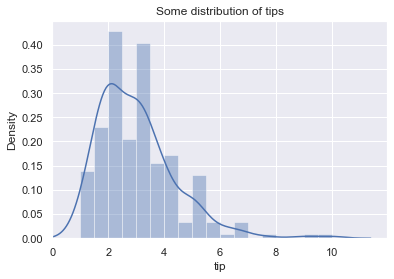

In [18]:
sns.set(color_codes=True)
chart = sns.distplot(data['tip'])

plt.xlim(xmin=0)
plt.ylabel('Density')
chart.set_title('Some distribution of tips')
plt.show()

___
Answer:
- The distribution of tips is an approximate bimodal distribution which appears as distinct peaks (local maxima) in the probability density function.
- The amount of tip between 2 and 4 occupy the two biggest proportion each greater than 0.40.
___

/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


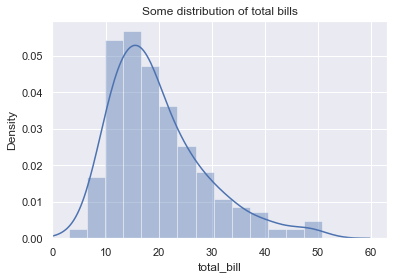

In [19]:
sns.set(color_codes=True)
chart = sns.distplot(data['total_bill'])

plt.xlim(xmin=0)
plt.ylabel('Density')
chart.set_title('Some distribution of total bills')
plt.show()

___
Answer:
- The distribution of total bills is a unimodal distribution with one most frequent value.
- The most frequent value of total bill is between 10 and 20 and the density of the most frequent value is over 0.05.
___

Now plot them on the *same* plot, and add a legend. Hint: use attribute 'label' to give them names, and call legend() on one of the plots to draw the legend

/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aishan/Projects/Pycharm/Notebook/venv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


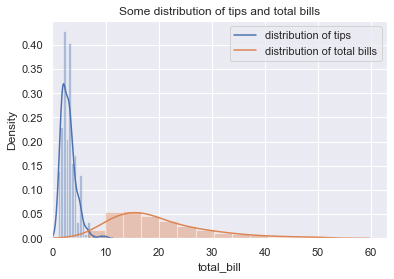

In [20]:
chart = sns.distplot(data['tip'], label="distribution of tips")
chart = sns.distplot(data['total_bill'],label="distribution of total bills")

plt.xlim(xmin=0)
plt.ylabel('Density')
chart.set_title('Some distribution of tips and total bills')
plt.legend(["distribution of tips", "distribution of total bills"])
plt.show()

## Excercises

For all these questions, create a graph, and explain what conclusions you draw from the graph using a text field. It is not enough to just make the graph, you have to say what you are reading from it.

Do people give different average tips on different days? (Have you calculated this relative to the size of the bill, or just the tip amount?) Hint: boxplot

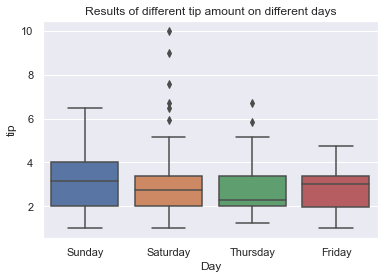

In [21]:
chart = sns.boxplot(x='day', y='tip', data=data)
chart.set_title('Results of different tip amount on different days')
plt.xlabel('Day')
plt.show()

___
Answer:
The graph is relative to the tip amount.
The median is the average value from this set of data and is shown by the line that divided the box into two parts.
On Sunday and Friday, people tended to give more tips on average, while on Saturday, customers gave less tips.
Then, on Thursday, the tips from customers are least.
___

How does the size of the tip relate to the size of the bill? Hint: scatterplot, lmplot

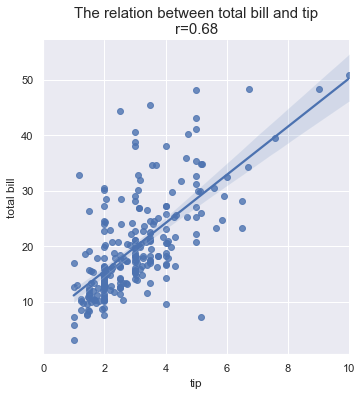

In [22]:
chart = sns.lmplot(x='tip', y='total_bill', data=data)
r_value = data['tip'].corr(data['total_bill']).round(2) # Pearson's r Value

plt.xlim(left=0)
plt.title(f'The relation between total bill and tip\nr={r_value}', fontdict = {'fontsize' : 15})
plt.ylabel('total bill')
plt.show()

___
Answer:
The relationship between tip and total bill is positive correlation. The Pearson's r Value is around 0.68.
___

Does the proportion of the bill given as a tip relate to the number of people eating?

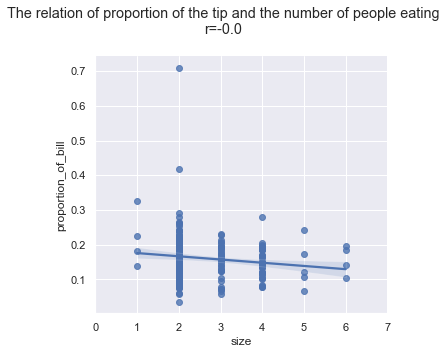

In [23]:
chart = sns.lmplot(x='size', y='proportion_of_bill', data=data)
r_value = data['size'].corr(data['proportion_of_bill']).round()

_xmax = data['size'].max()+1
plt.xlim(xmin=0, right=_xmax)
chart.fig.suptitle(f"The relation of proportion of the tip and the number of people eating\nr={r_value}")
chart.fig.tight_layout()
plt.show()

___
Answer:
The Pearson's r Value of these two attributes is 0. There is no relationship between variables at all.
___


Bonus Question: Create a boxplot showing total bills and tips for each day next to each other in a different colour. Do you see any patterns?

Hint: use melt (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) to reshape the data, so that you have new dataset, with a column for the day, a column for the amount, and a type column that says whether it is a total_bill or a tip. Then you can boxplot that, and use the type column to set the color.

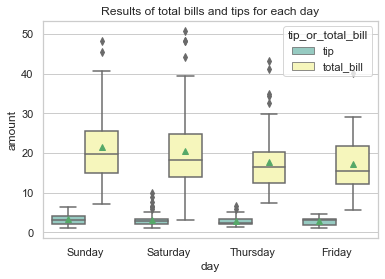

In [24]:
sns.set_style("whitegrid")
m_data = pd.melt(data, id_vars=['day'], value_vars=['tip','total_bill'], var_name='tip_or_total_bill', value_name='amount')
chart = sns.boxplot(x='day', y='amount', hue='tip_or_total_bill', data=m_data, palette='Set3', showmeans=True)

chart.set_title('Results of total bills and tips for each day')
plt.show()


Answer:
- The amount of total bill and tip on weekends is bigger than that on weekdays. Parently, the biggest amount of bill on weekends is much bigger than that on weekdays.
- The total bills of weekend groups are more variable than others.
- The total bills of groups are top-skewed.Most of the cost is relatively low, a few customers spend much money.

# Open Question
Use 2 graphs and associated text to explain something else that you have found in the data. Try to relate it to causes, i.e. explain *why* the data might be this way. There is a lot you don't know, so it's OK to guess - think about what happens when people go to restaurants, and what might be a possible cause for what you see in the data.

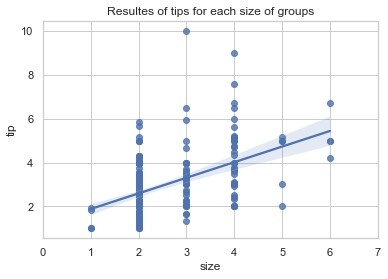

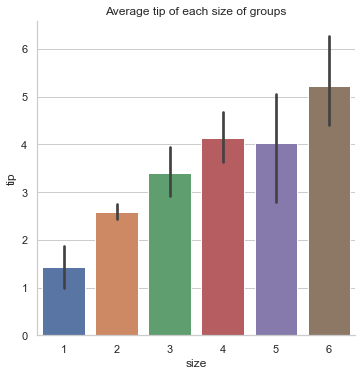

In [25]:
chart = sns.regplot(x='size', y='tip', data=data)
# chart = sns.boxplot(x='size', y='tip', data=data, showmeans=True)
_right = data['size'].max()+1
plt.title('Resultes of tips for each size of groups')
plt.xlim(left=0, right=_right)
plt.show()

chart = sns.catplot(x='size', y='tip', data=data, kind='bar')
plt.title('Average tip of each size of groups')
plt.show()

___
Answer:  
The relationship between size of groups and tips is positive. In the bar plot, the mean of each array is the height of the bars. Next, the standard deviation is the height of the error bars.
We can see the standard deviation of the 6-people and 5-people groups' data is greater than the standard deviation of others by looking at the error by lengths.
___

# Reflection
Write up to 100 words about your experience and what you have learnt. Which parts of the tools were useful, how can you relate what you've done in this assignment to your personal practice?

...